## 포스트 코로나 정의


---






Text(2020-04-20 00:00:00, 90, '코로나 안정기')

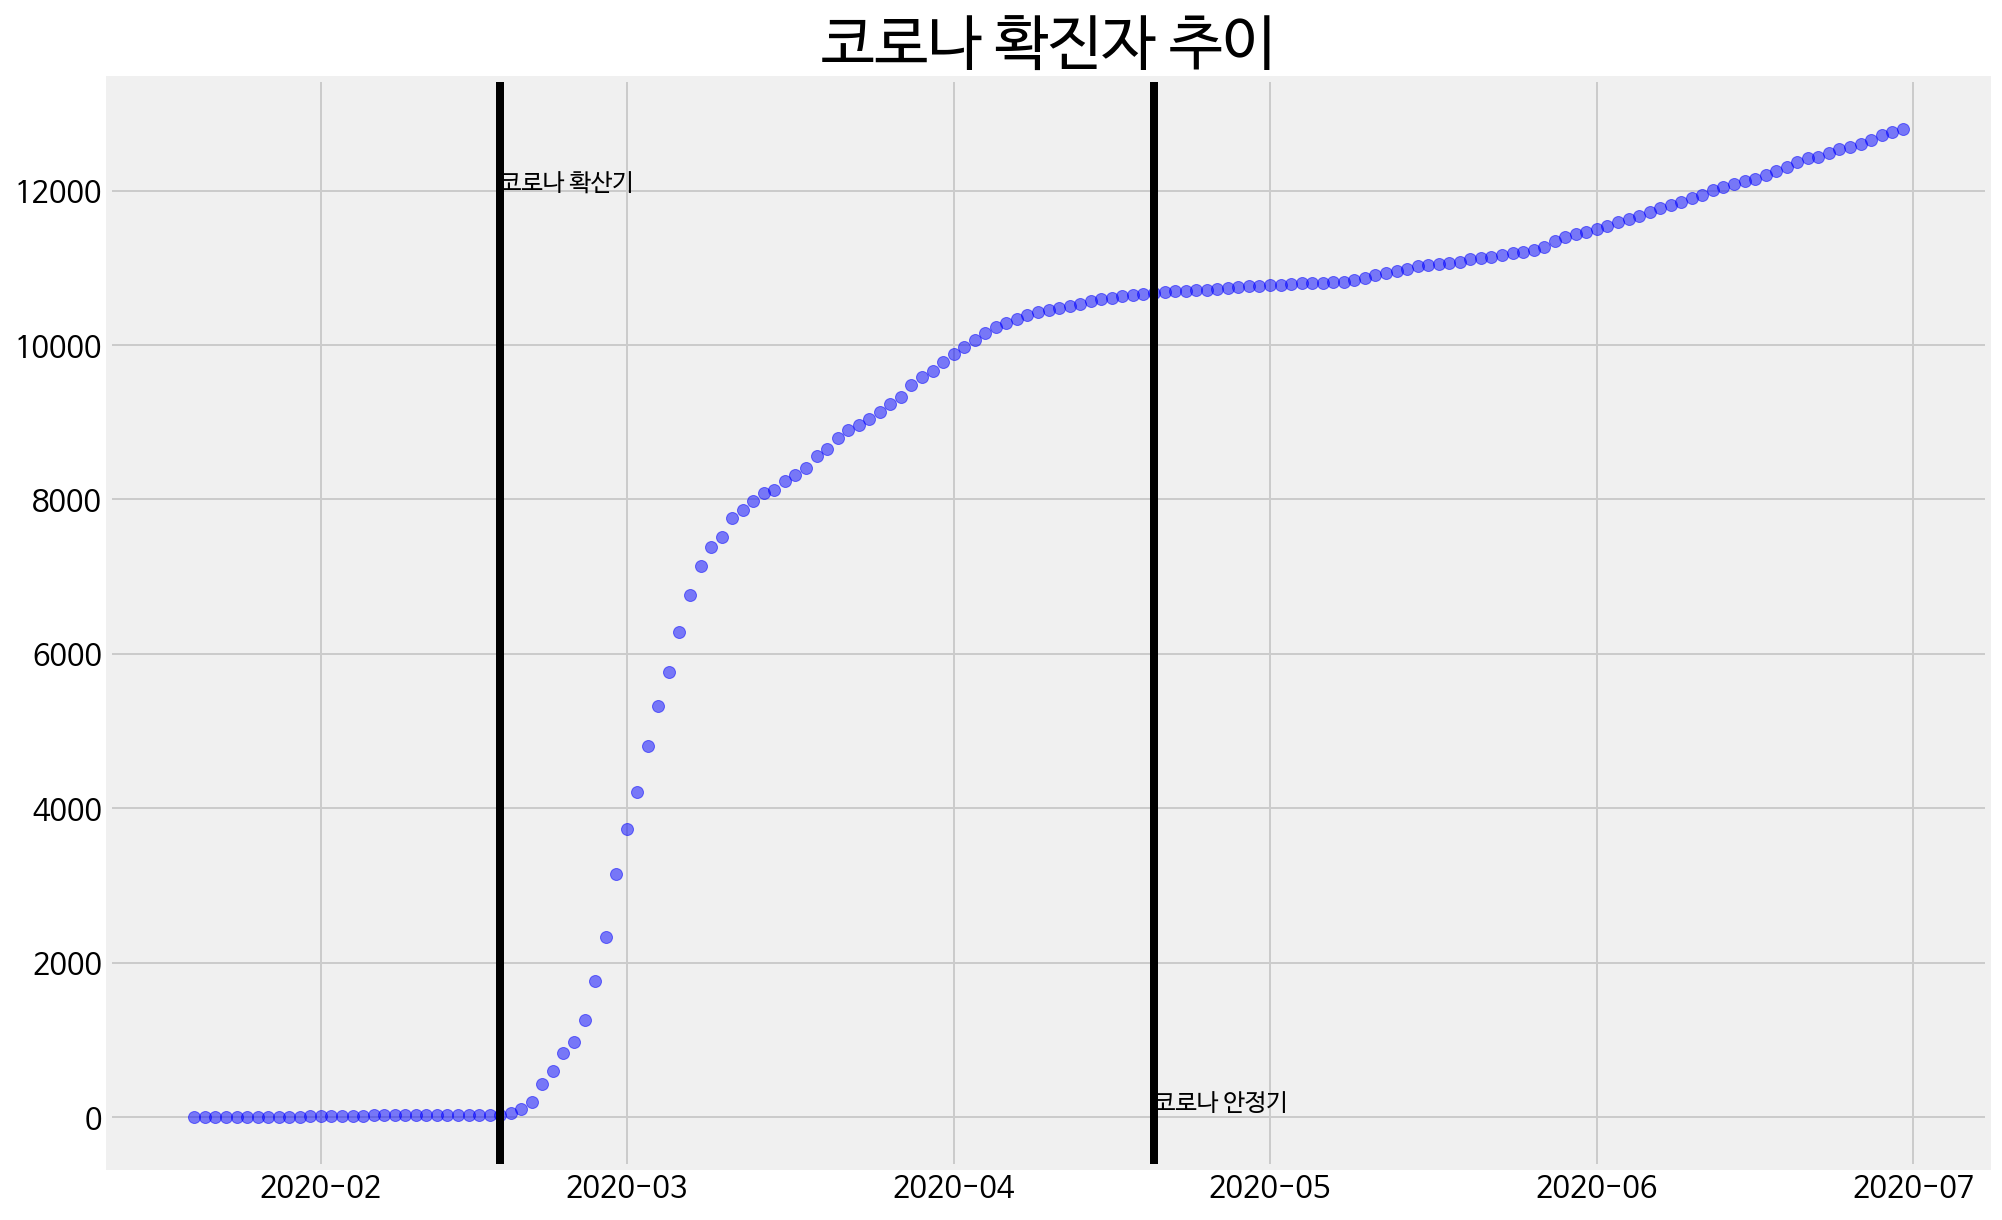

In [ ]:
#확진자 추이 변화
time['date'] = pd.to_datetime(time['date'], format='%Y-%m-%d')
date = time.date
confirmed = time.confirmed

px,py = date,confirmed
plt.rcParams['figure.figsize'] = (15,10)
#시간별 코로나 확진자 수 증가 추이
plt.scatter(px,py, facecolor = 'blue',alpha = 0.5)
plt.title('코로나 확진자 추이', fontsize = 30)
plt.axvline(datetime.datetime(2020,2,18), color='black')
plt.text(datetime.datetime(2020,2,18), 12000,'코로나 확산기', fontsize=12)
plt.axvline(datetime.datetime(2020,4,20), color='black')
plt.xticks(fontsize=15, rotation=0)
plt.yticks(fontsize=15, rotation=0)
plt.text(datetime.datetime(2020,4,20), 90,'코로나 안정기', fontsize=12)

In [ ]:
#전처리 함수 및 데이터 변환
def covid_preprocessing(df):
  df.columns=['날짜',"검사자수", '확진자수']
  df['날짜'] = pd.to_datetime(df['날짜'])
  df['검사자수_전일'] = [0] + df['검사자수'].iloc[:-1].tolist()
  df['검사자수_신규'] = df['검사자수'] - df['검사자수_전일']
  df['확진자수_전일'] = [0] + df['확진자수'].iloc[:-1].tolist()
  df['확진자수_신규'] = df['확진자수'] - df['확진자수_전일']

  pre_weeks_df = pd.DataFrame(pd.date_range(pd.to_datetime('2020-01-01'), pd.to_datetime('2020-01-19')),
                              columns=['날짜'])
  df = pd.merge(pre_weeks_df, df, 'outer', '날짜').fillna(0)

  df['월'] = df['날짜'].dt.month
  df['주차'] = df['날짜'].dt.weekofyear
  df = df.drop(['검사자수_전일','확진자수_전일'], axis=1)
  return df
covid_time_processed=time[['date',"test", 'confirmed']]
covid_time_processed=covid_preprocessing(covid_time_processed)

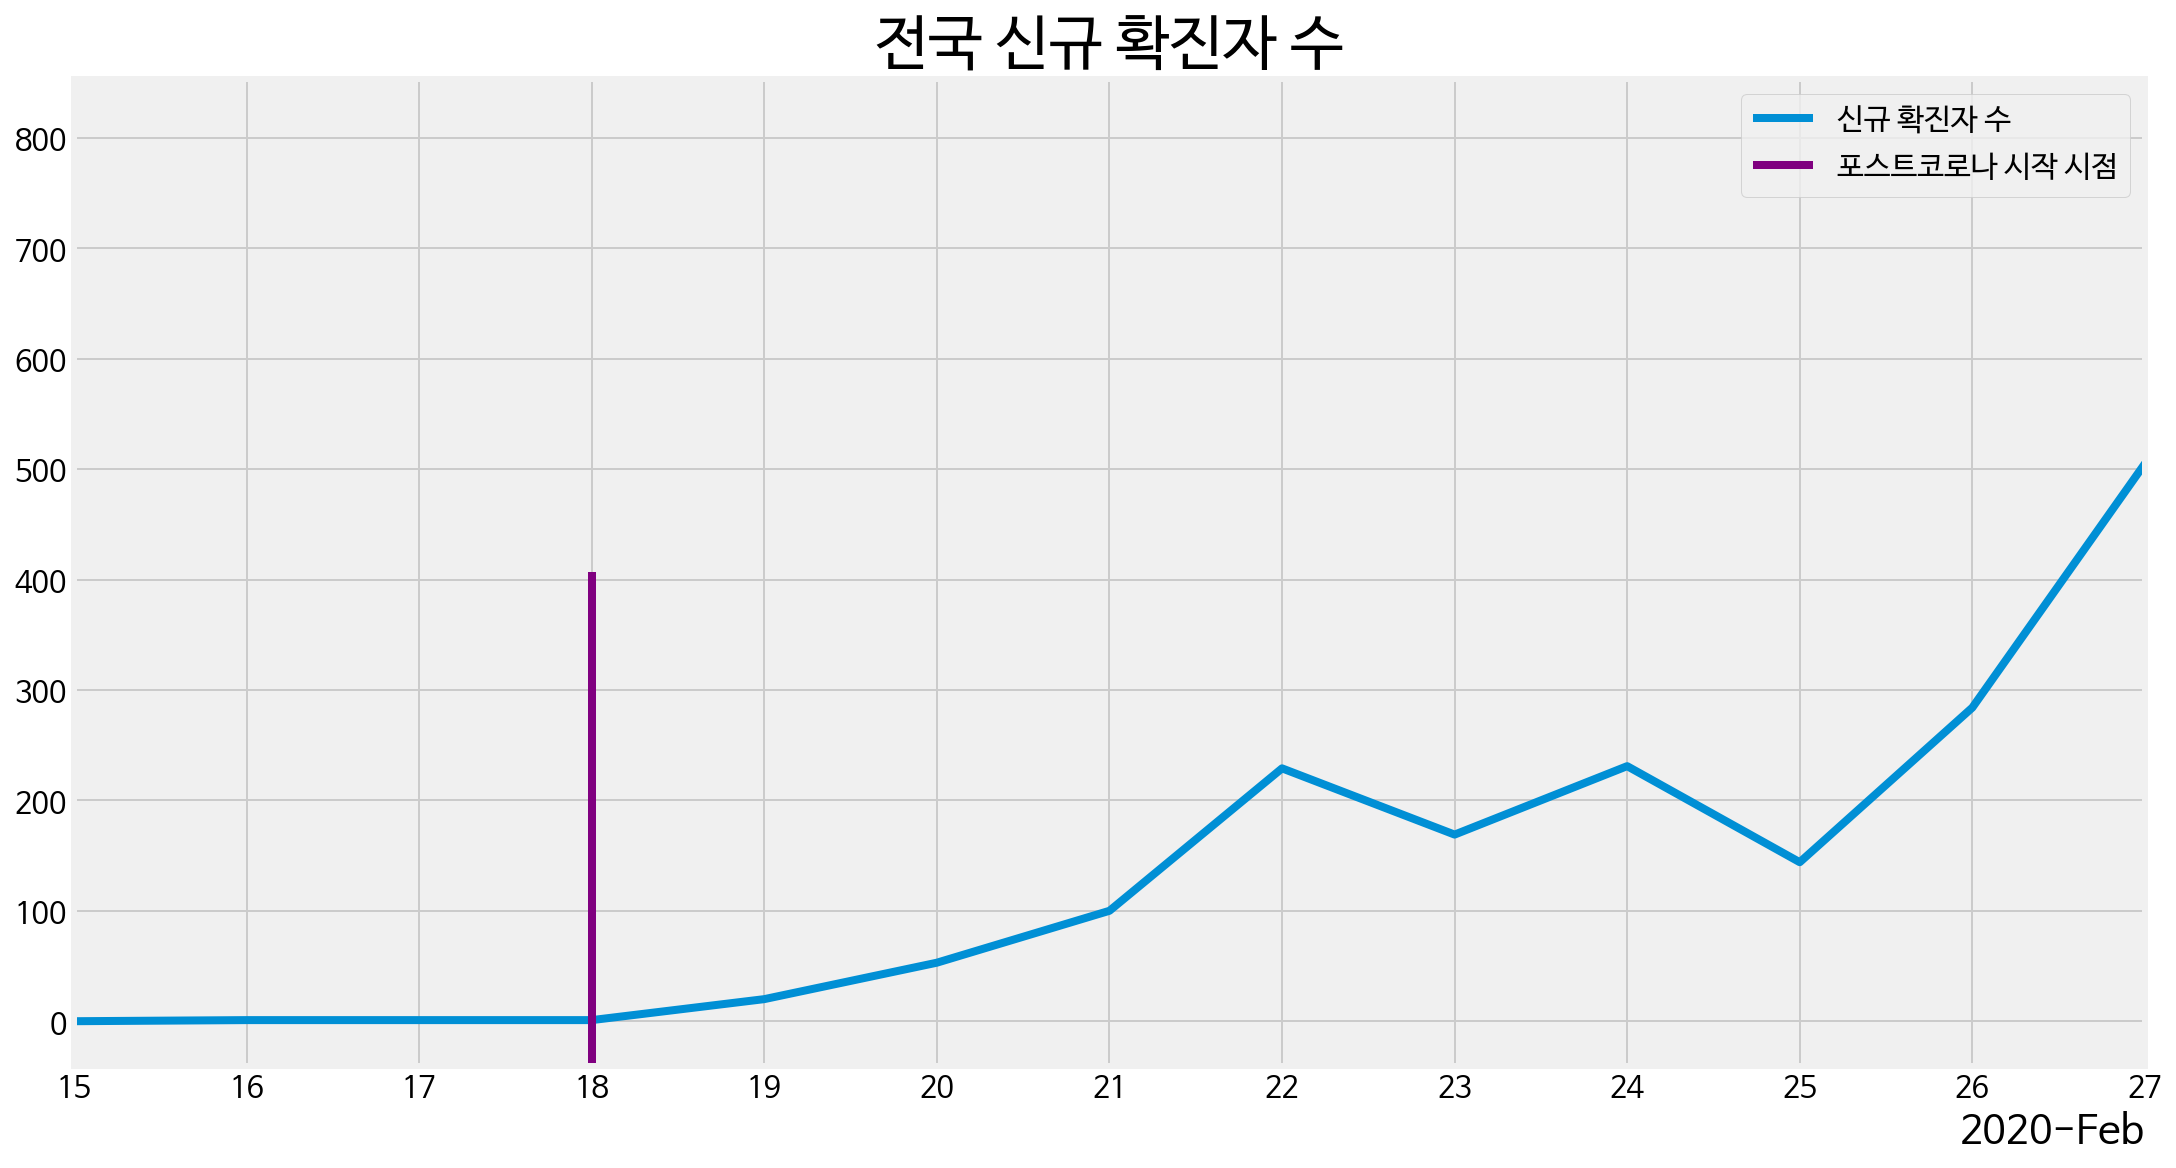

In [ ]:
#그래프
y = covid_time_processed
fig, ax= plt.subplots(1, 1, constrained_layout=True, figsize=(15, 8))
locator = mdates.AutoDateLocator(minticks=12, maxticks=14)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

ax.plot(y["날짜"], y["확진자수_신규"], label='신규 확진자 수')
ax.set_xlim(np.datetime64('2020-02-15'), np.datetime64('2020-02-27'))
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)
ax.set_title('전국 신규 확진자 수', size=40)
plt.axvline(y["날짜"][48], ymax=0.5,color='purple', label='포스트코로나 시작 시점')
plt.xticks(fontsize=15, rotation=0)
plt.yticks(fontsize=15, rotation=0)
plt.legend(fontsize=15, loc="best")
plt.title("전국 신규 확진자 수",fontsize=30)


plt.show()




코로나 감염자가 급격하게 증가하기 시작한 2월 18일을 코로나 확산기로 정하였으며, 코로나 확진자의 숫자가 안정화되는 4월 20일을 코로나 안정기로 정하였다. 코로나 확산기 이후를 포스트 코로나로 정의하였으며, 포스트 코로나 전과 후를 중심으로 데이터를 분석해 보았다.

---

